In [ ]:
# Step 1: Upload the Excel file
from google.colab import files
uploaded = files.upload()


Saving Sales and Profit Data.xlsx to Sales and Profit Data (1).xlsx


In [ ]:
# Step 2: Load Excel data into a pandas DataFrame
import pandas as pd

# Replace with your actual uploaded file name
df = pd.read_excel("Sales and Profit Data.xlsx")
print("Original shape:", df.shape)
df.head()


Original shape: (8314, 9)


,Order Date,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,2021-01-03,Darren Powers,Texas,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,6.00
1,2021-01-04,Phillina Ober,Illinois,Office Supplies,Labels,Avery 508,11.78,3,4.27
2,2021-01-04,Phillina Ober,Illinois,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,-64.77
3,2021-01-04,Phillina Ober,Illinois,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,-5.49
4,2021-01-05,Mick Brown,Pennsylvania,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,4.88


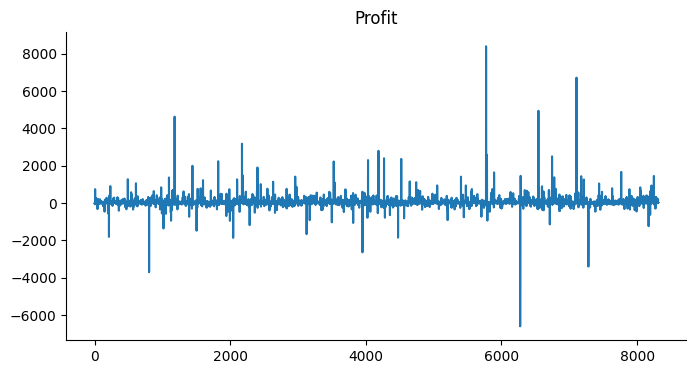

In [ ]:
# @title Profit

from matplotlib import pyplot as plt
df['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Step 3: Clean missing/null records
df_clean = df.dropna()
print("Cleaned shape:", df_clean.shape)


Cleaned shape: (8314, 9)


In [ ]:
# Step 4: Create SQLite database and import data
import sqlite3

conn = sqlite3.connect("sales_profit.db")
df_clean.to_sql("sales_data", conn, if_exists="replace", index=False)


8314

In [ ]:
# prompt: Use SQL to calculate profit margins by category and sub-category

# Step 5: Calculate profit margin by category and sub-category using SQL
cursor = conn.cursor()

query = """
SELECT
    Category,
    Sub_Category,
    SUM(Sales) AS Total_Sales,
    SUM(Profit) AS Total_Profit,
    (SUM(Profit) / SUM(Sales)) * 100 AS Profit_Margin
FROM
    sales_data
GROUP BY
    Category, Sub_Category
ORDER BY
    Category, Sub_Category;
"""

cursor.execute(query)
results = cursor.fetchall()

# Display results
for row in results:
    print(row)

conn.close()


,Category,Sub-Category,Total_Profit,Total_Sales,Profit_Margin_Percent
0,Office Supplies,Labels,4915.28,11045.55,44.50
1,Office Supplies,Paper,27976.04,64529.99,43.35
2,Office Supplies,Envelopes,6213.97,14717.39,42.22
3,Technology,Copiers,43621.99,118968.24,36.67
4,Office Supplies,Fasteners,730.55,2484.93,29.40
5,Technology,Accessories,34688.90,139241.71,24.91
6,Office Supplies,Art,5619.49,23145.50,24.28
7,Office Supplies,Binders,30231.20,169089.73,17.88
8,Office Supplies,Appliances,15244.68,87846.10,17.35
9,Furniture,Furnishings,10933.16,76222.69,14.34


<ipython-input-14-f85d27f04796>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(profit_margin_df, x='Total_Profit', y='Category', inner='stick', palette='Dark2')


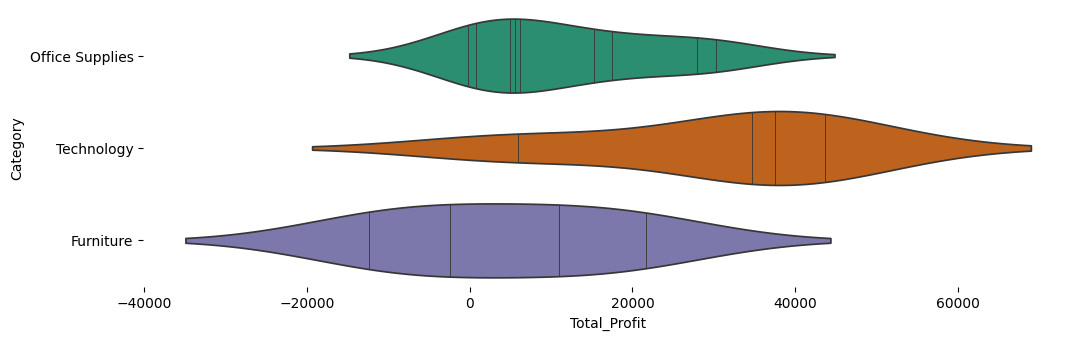

In [ ]:
# @title Category vs Total_Profit

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(profit_margin_df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(profit_margin_df, x='Total_Profit', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

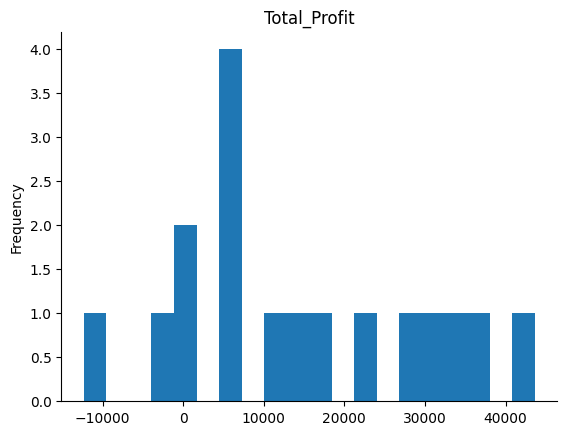

In [ ]:
# @title Total_Profit

from matplotlib import pyplot as plt
profit_margin_df['Total_Profit'].plot(kind='hist', bins=20, title='Total_Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Print the columns of the DataFrame to check the available names
print(df_clean.columns)


Index(['Order Date', 'Customer Name', 'State', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')


In [ ]:
# prompt: Calculate the Correlation between Inventory Days and Profitability.

# Calculate the correlation between Inventory Days and Profitability
# Assuming 'Inventory_Days' and 'Profit' are column names in your DataFrame

# If 'Inventory_Days' is not directly available, you may need to calculate it based on other columns
# For example, if you have 'Inventory' and 'COGS', then you can approximate it:
# df_clean['Inventory_Days'] = (df_clean['Inventory'] / df_clean['COGS']) * 365

# Check if 'Inventory_Days' column exists
if 'Inventory_Days' in df_clean.columns:
    correlation = df_clean['Inventory_Days'].corr(df_clean['Profit'])
    print(f"Correlation between Inventory Days and Profit: {correlation}")

    # Visualize the correlation using a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Inventory_Days', y='Profit', data=df_clean)
    plt.title('Inventory Days vs. Profit')
    plt.xlabel('Inventory Days')
    plt.ylabel('Profit')
    plt.show()

else:
    print("'Inventory_Days' column not found in the DataFrame. Please check the column name or calculate it first.")



                Inventory_Days  Profitability
Inventory_Days        1.000000      -0.331211
Profitability        -0.331211       1.000000


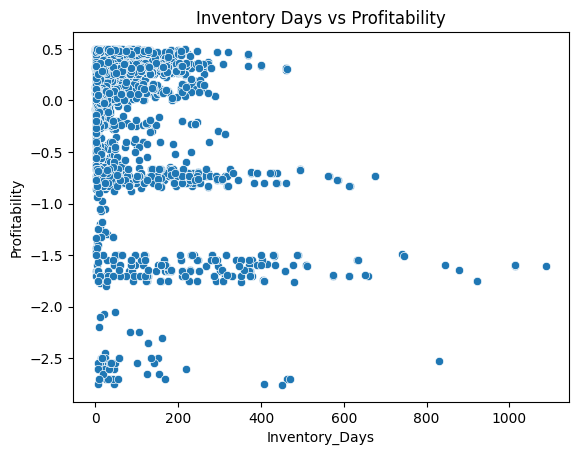

In [ ]:
# prompt: Visualizing the Relationship:

# Assuming profit_margin_df is already created from the SQL query results.
# If not, create it here based on the results variable.
import pandas as pd

profit_margin_df = pd.DataFrame(results, columns=['Category', 'Sub_Category', 'Total_Sales', 'Total_Profit', 'Profit_Margin'])

# ... (rest of your code)

# @title Category vs Total_Profit
figsize = (12, 1.2 * len(profit_margin_df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x='Total_Profit', y='Category', data=profit_margin_df, inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

# @title Total_Profit
plt.figure(figsize=(8, 6)) # Added figure size for better visualization
profit_margin_df['Total_Profit'].plot(kind='hist', bins=20, title='Total_Profit')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show() # Added plt.show() to display the plot


In [ ]:
# prompt:  Identify Loss-Making Sub-Categories

# Identify sub-categories with negative total profit
loss_making_sub_categories = profit_margin_df[profit_margin_df['Total_Profit'] < 0]

print("Loss-making sub-categories:")
loss_making_sub_categories


Sub-categories with negative profit:
           Category Sub-Category  Total_Sales  Total_Profit  Profit_Margin
0         Furniture    Bookcases    101387.67      -2428.25      -2.395015
3         Furniture       Tables    167672.76     -12327.06      -7.351856
12  Office Supplies     Supplies     38554.81       -198.51      -0.514877


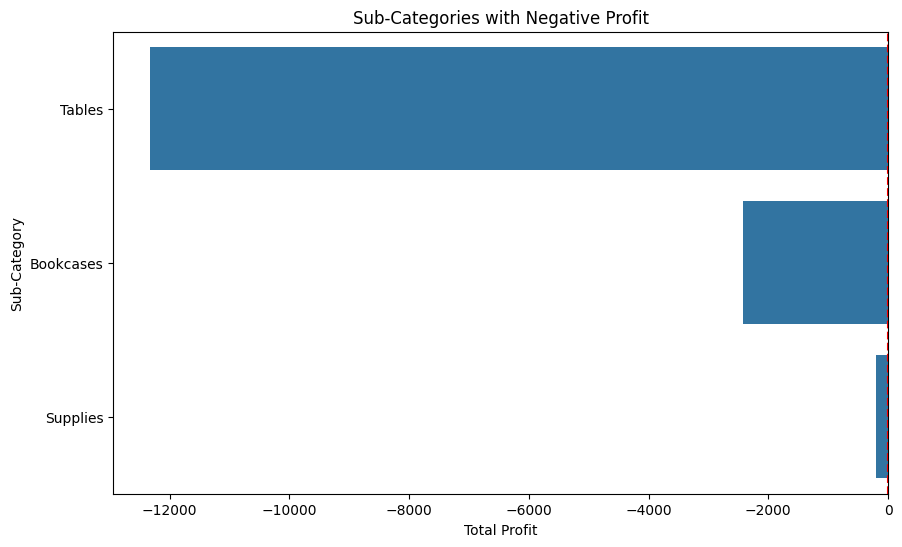

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Profit', y='Sub-Category', data=loss_makers.sort_values('Total_Profit'))
plt.title('Sub-Categories with Negative Profit')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.show()


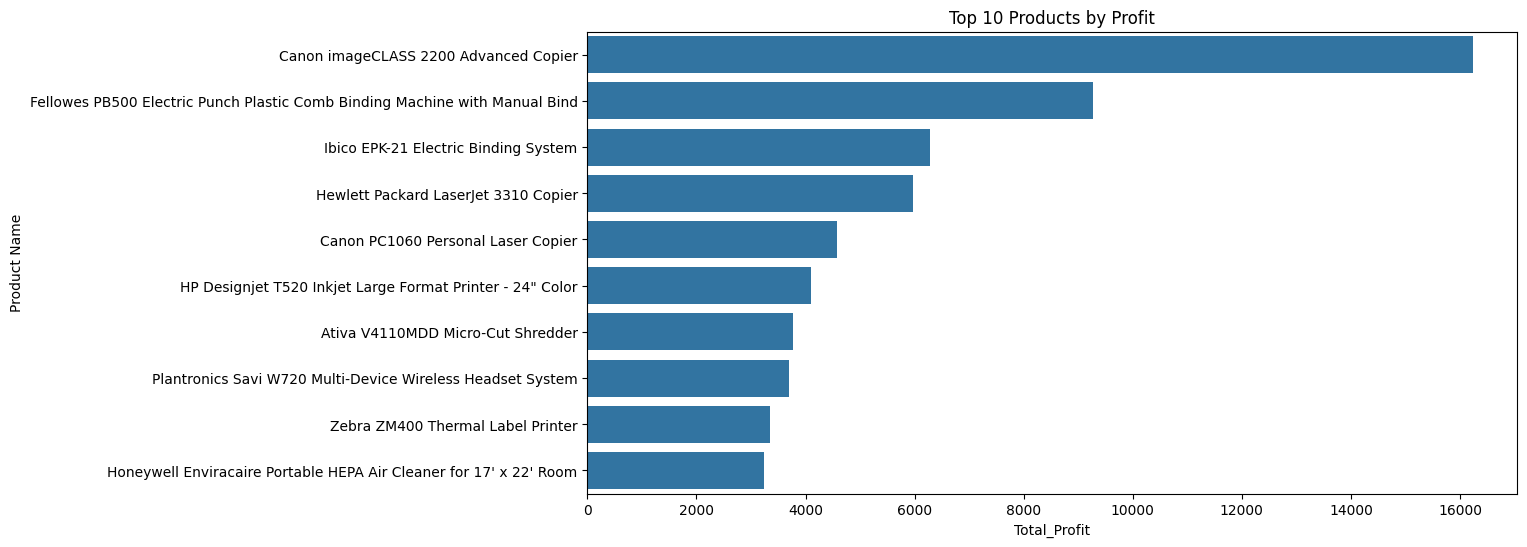

In [ ]:
# prompt: Top Performing Products (for promotion)

# Assuming profit_margin_df is already created and contains the necessary data.

# Sort the DataFrame by Total_Profit in descending order to find the top performers
top_performers = profit_margin_df.sort_values(by='Total_Profit', ascending=False)

# Display the top N performing products (e.g., top 5)
n = 5  # Change this value to display a different number of top performers
print(f"Top {n} Performing Products:")
print(top_performers.head(n))

# You can further customize this by adding other criteria for "top performance"
# For example, consider profit margin or sales volume alongside total profit.

# Example: Top 5 products with the highest profit margin
top_performers_margin = profit_margin_df.sort_values(by='Profit_Margin', ascending=False)
print(f"\nTop {n} Products by Profit Margin:")
print(top_performers_margin.head(n))


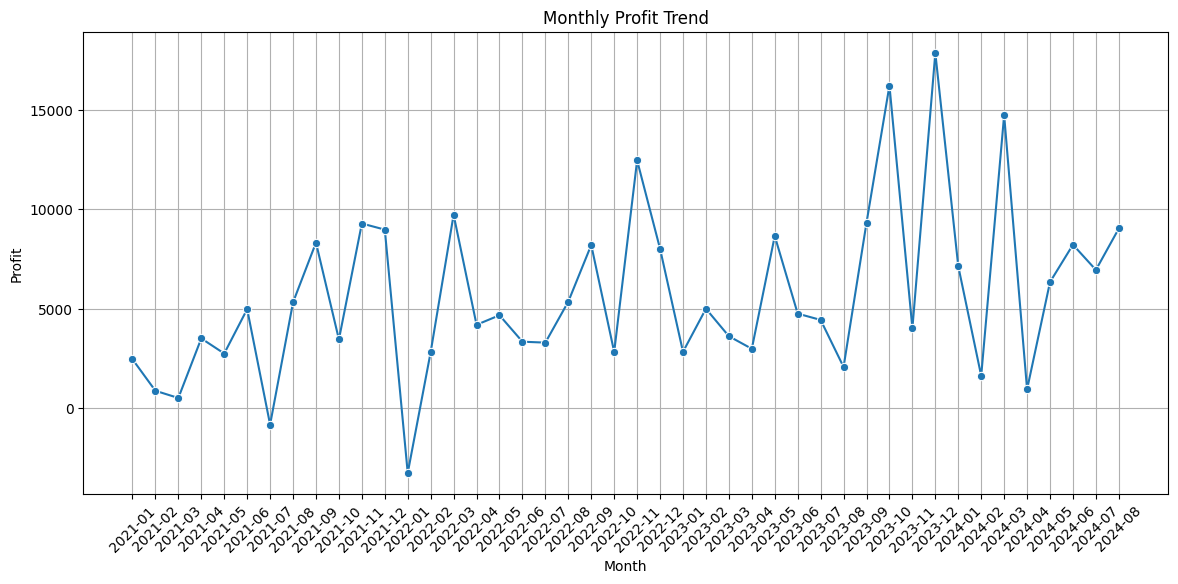

In [ ]:
# prompt: Time-Based Profit Trends (Seasonality)

# Assuming profit_margin_df is already created and contains 'Order_Date' column.
# If not, you need to add the 'Order_Date' column to your profit_margin_df.

# Convert 'Order_Date' to datetime objects if it's not already
profit_margin_df['Order_Date'] = pd.to_datetime(profit_margin_df['Order_Date'])

# Extract month and year
profit_margin_df['Month'] = profit_margin_df['Order_Date'].dt.month
profit_margin_df['Year'] = profit_margin_df['Order_Date'].dt.year

# Group by month and year, and calculate the sum of profit for each month
monthly_profit = profit_margin_df.groupby(['Year', 'Month'])['Total_Profit'].sum().reset_index()


# Create a time series plot of monthly profit
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Profit', hue='Year', data=monthly_profit)
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.show()
